In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#with nan as 0
import pandas as pd
Dataset = "CheXpert-v1.0-small"
data = pd.read_csv(os.path.join(Dataset,"train.csv"))
data = data.drop(['Sex', 'Age', 'Frontal/Lateral', 'AP/PA'], axis=1)
categories = list(data.columns.values)
print(categories)
data.replace(np.nan, 0, inplace=True)
for i in categories:
    data.loc[data[i] == -1, i] = 0
print(data.head(10))

['Path', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
                                                Path  No Finding  \
0  CheXpert-v1.0-small/train/patient00001/study1/...         1.0   
1  CheXpert-v1.0-small/train/patient00002/study2/...         0.0   
2  CheXpert-v1.0-small/train/patient00002/study1/...         0.0   
3  CheXpert-v1.0-small/train/patient00002/study1/...         0.0   
4  CheXpert-v1.0-small/train/patient00003/study1/...         0.0   
5  CheXpert-v1.0-small/train/patient00004/study1/...         1.0   
6  CheXpert-v1.0-small/train/patient00004/study1/...         1.0   
7  CheXpert-v1.0-small/train/patient00005/study1/...         1.0   
8  CheXpert-v1.0-small/train/patient00005/study1/...         1.0   
9  CheXpert-v1.0-small/train/patient00005/study2/...         0.0   

   Enlarged C

In [28]:
print("Number of rows in data =",data.shape[0])
print("Number of columns in data =",data.shape[1])
data1 = pd.read_csv(os.path.join(Dataset,"valid.csv"))
print(data1.head(10))

Number of rows in data = 223414
Number of columns in data = 15
                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/valid/patient64541/study1/...    Male   73   
1  CheXpert-v1.0-small/valid/patient64542/study1/...    Male   70   
2  CheXpert-v1.0-small/valid/patient64542/study1/...    Male   70   
3  CheXpert-v1.0-small/valid/patient64543/study1/...    Male   85   
4  CheXpert-v1.0-small/valid/patient64544/study1/...  Female   42   
5  CheXpert-v1.0-small/valid/patient64545/study1/...  Female   55   
6  CheXpert-v1.0-small/valid/patient64546/study1/...    Male   56   
7  CheXpert-v1.0-small/valid/patient64547/study1/...    Male   59   
8  CheXpert-v1.0-small/valid/patient64547/study1/...    Male   59   
9  CheXpert-v1.0-small/valid/patient64547/study1/...    Male   59   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         0.0                         1.0           1.0   
1         Front

['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


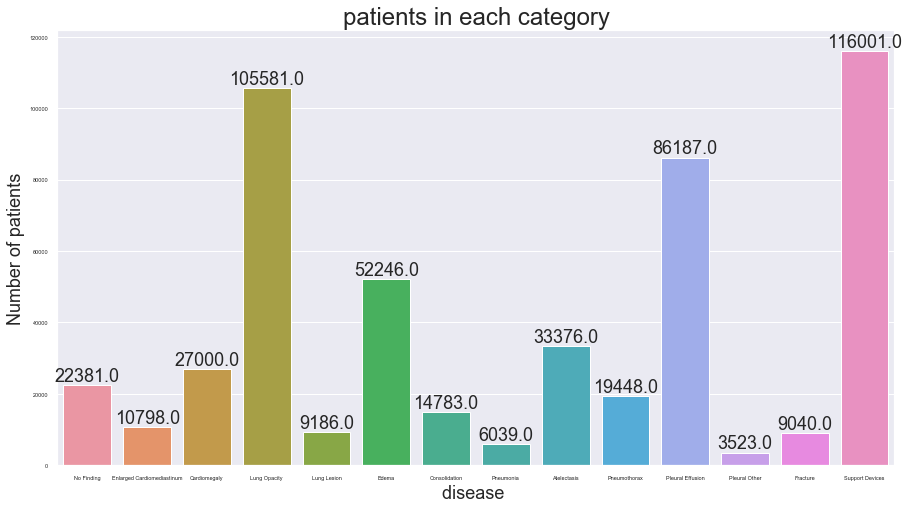

In [38]:
categories = list(data.columns.values)
categories = categories[1:]
sns.set(font_scale = 0.5)
plt.figure(figsize=(15,8))
print(categories)
ax= sns.barplot(x = categories, y= data.iloc[:,1:].sum().values)

plt.title("patients in each category", fontsize=24)
plt.ylabel('Number of patients', fontsize=18)
plt.xlabel('disease ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

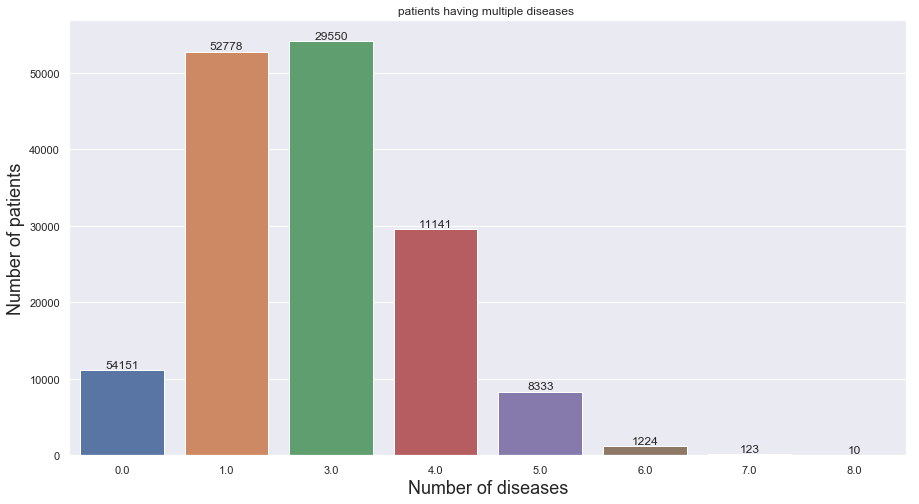

In [41]:
rowSums = data.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("patients having multiple diseases ")
plt.ylabel('Number of patients', fontsize=18)
plt.xlabel('Number of diseases', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [43]:
data.to_csv("train2.csv",index=False)